# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [3]:
import collections

counter = collections.Counter()
for i in target:
    counter[i]+=1
    
counter

Counter({'van': 199, 'saab': 217, 'bus': 218, 'opel': 212})

Видим что выборока достаточно сбалансирована

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4    5   6    7   8   9   10   11   12   13  14  15  \
0   669   85  44   66  125   58   6  148  45  19  145  170  323  185  84   8   
1   433   85  42   70  130   56   7  150  45  19  145  177  328  172  82  10   
2   563   89  42   75  140   55   6  145  46  19  139  170  312  166  71  15   
3   549  107  51  103  182   56  11  213  31  24  162  226  673  217  72   2   
4    45   93  46   82  145   58  11  159  43  20  160  180  371  189  77   2   
5   706   82  43   70  250  105  55  139  48  18  145  231  289  172  99   4   
6   406   80  38   64  130   59   8  134  51  18  126  152  259  135  76   1   
7   456   92  43   70  124   52   6  139  49  18  144  164  282  172  79   4   
8   545   88  44   84  135   55  12  155  44  20  158  176  351  164  75   7   
9   208   86  46   70  149   65   8  149  45  19  146  170  331  185  77   6   
10  216   84  44   77  150   59   5  152  44  19  143  175  344  177  77   8   
11  511   88  38   77  156   56   7  163  41  20  129  184  395  140  67   1   
12  577   99  54  100  199   62   9  200  33  23  166  222  600  241  70   2   
13  487   93  45   81  177   64   7  160  41  20  147  180  383  188  70  11   
14   90  104  55  107  222   68  11  218  31  24  173  232  703  229  71   3   

    16   17   18  
0    1  180  183  
1   14  181  185  
2   26  191  198  
3    4  188  198  
4    4  183  194  
5    9  190  199  
6   23  179  188  
7   16  183  185  
8   11  183  195  
9    6  183  188  
10   2  183  187  
11   9  192  198  
12   7  189  198  
13  11  192  199  
14  10  188  199

Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   431.431694   93.744991   45.007286   82.382514  169.167577   61.668488   
std    246.707282    8.267902    6.134141   15.662713   33.987776    8.147776   
min      0.000000   78.000000   34.000000   44.000000  105.000000   47.000000   
25%    212.000000   87.000000   40.000000   70.000000  140.000000   57.000000   
50%    443.000000   93.000000   44.000000   80.000000  168.000000   61.000000   
75%    646.000000  100.000000   50.000000   98.000000  197.000000   65.000000   
max    844.000000  119.000000   58.000000  110.000000  333.000000  138.000000   

               6           7           8           9           10          11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     8.539162  169.941712   40.653916   20.655738  148.191257  189.670310   
std      4.564303   33.096633    7.686162    2.586438   14.568421   31.353975   
min      2.000000  114.000000   26.000000   17.000000  118.000000  132.000000   
25%      7.000000  147.000000   33.000000   19.000000  137.000000  168.000000   
50%      8.000000  158.000000   43.000000   20.000000  146.000000  179.000000   
75%     10.000000  200.000000   46.000000   23.000000  160.000000  218.000000   
max     55.000000  265.000000   59.000000   29.000000  188.000000  320.000000   

                12          13          14          15          16  \
count   549.000000  549.000000  549.000000  549.000000  549.000000   
mean    445.118397  175.606557   72.775956    6.174863   12.956284   
std     176.537424   32.527558    7.370468    4.850919    8.982439   
min     192.000000  109.000000   59.000000    0.000000    0.000000   
25%     321.000000  150.000000   68.000000    2.000000    6.000000   
50%     367.000000  174.000000   72.000000    5.000000   12.000000   
75%     600.000000  200.000000   76.000000    9.000000   19.000000   
max    1018.000000  268.000000  135.000000   22.000000   40.000000   

               17          18  
count  549.000000  549.000000  
mean   188.663024  195.329690  
std      6.214338    7.416362  
min    176.000000  181.000000  
25%    184.000000  190.000000  
50%    188.000000  196.000000  
75%    193.000000  201.000000  
max    204.000000  211.000000

In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).head(15)

0         1         2         3         4         5          6  \
0   0.963834 -1.058668 -0.164360 -1.046910 -1.300699 -0.450655  -0.556816   
1   0.006363 -1.058668 -0.490701 -0.791294 -1.153453 -0.696344  -0.337525   
2   0.533784 -0.574428 -0.490701 -0.471773 -0.858961 -0.819189  -0.556816   
3   0.476984  1.604651  0.977835  1.317542  0.377904 -0.696344   0.539640   
4  -1.567786 -0.090189  0.161982 -0.024444 -0.711715 -0.450655   0.539640   
5   1.113946 -1.421848 -0.327530 -0.791294  2.380448  5.323051  10.188458   
6  -0.103179 -1.663968 -1.143384 -1.174718 -1.153453 -0.327810  -0.118234   
7   0.099676 -0.211249 -0.327530 -0.791294 -1.330148 -1.187724  -0.556816   
8   0.460756 -0.695488 -0.164360  0.103364 -1.006207 -0.819189   0.758932   
9  -0.906481 -0.937608  0.161982 -0.791294 -0.593919  0.409259  -0.118234   
10 -0.874024 -1.179728 -0.164360 -0.343965 -0.564469 -0.327810  -0.776108   
11  0.322815 -0.695488 -1.143384 -0.343965 -0.387774 -0.696344  -0.337525   
12  0.590583  0.636171  1.467347  1.125830  0.878540  0.040725   0.101058   
13  0.225445 -0.090189 -0.001189 -0.088348  0.230658  0.286414  -0.337525   
14 -1.385217  1.241471  1.630518  1.573159  1.555871  0.777793   0.539640   

           7         8         9        10        11        12        13  \
0  -0.663564  0.565958 -0.640745 -0.219253 -0.627935 -0.692373  0.289048   
1  -0.603079  0.565958 -0.640745 -0.219253 -0.404474 -0.664025 -0.110978   
2  -0.754290  0.696181 -0.640745 -0.631478 -0.627935 -0.754740 -0.295605   
3   1.302173 -1.257158  1.294178  0.948719  1.159752  1.292017  1.273726   
4  -0.330900  0.305513 -0.253760  0.811310 -0.308705 -0.420228  0.412132   
5  -0.935743  0.956626 -1.027730 -0.219253  1.319366 -0.885142 -0.110978   
6  -1.086953  1.347294 -1.027730 -1.524633 -1.202548 -1.055233 -1.249513   
7  -0.935743  1.086849 -1.027730 -0.287957 -0.819473 -0.924830 -0.110978   
8  -0.451869  0.435736 -0.253760  0.673902 -0.436397 -0.533622 -0.357148   
9  -0.633322  0.565958 -0.640745 -0.150549 -0.627935 -0.647016  0.289048   
10 -0.542595  0.435736 -0.640745 -0.356661 -0.468320 -0.573310  0.042878   
11 -0.209932  0.045068 -0.253760 -1.318520 -0.181013 -0.284156 -1.095657   
12  0.909026 -0.996713  0.907194  1.223536  1.032060  0.878130  2.012235   
13 -0.300658  0.045068 -0.253760 -0.081844 -0.308705 -0.352192  0.381361   
14  1.453384 -1.257158  1.294178  1.704465  1.351289  1.462108  1.642980   

          14        15        16        17        18  
0   1.524229  0.376589 -1.332287 -1.395310 -1.664015  
1   1.252628  0.789258  0.116301 -1.234245 -1.394095  
2  -0.241175  1.820930  1.453459  0.376405  0.360385  
3  -0.105375 -0.861418 -0.997998 -0.106790  0.360385  
4   0.573627 -0.861418 -0.997998 -0.912115 -0.179455  
5   3.561234 -0.448749 -0.440848  0.215340  0.495345  
6   0.437826 -1.067753  1.119170 -1.556374 -0.989215  
7   0.845227 -0.448749  0.339161 -0.912115 -1.394095  
8   0.302026  0.170254 -0.217988 -0.912115 -0.044495  
9   0.573627 -0.036080 -0.775138 -0.912115 -0.989215  
10  0.573627  0.376589 -1.220857 -0.912115 -1.124175  
11 -0.784377 -1.067753 -0.440848  0.537470  0.360385  
12 -0.376976 -0.861418 -0.663708  0.054275  0.360385  
13 -0.376976  0.995592 -0.217988  0.537470  0.495345  
14 -0.241175 -0.655084 -0.329418 -0.106790  0.495345

<Figure size 1080x2160 with 0 Axes>

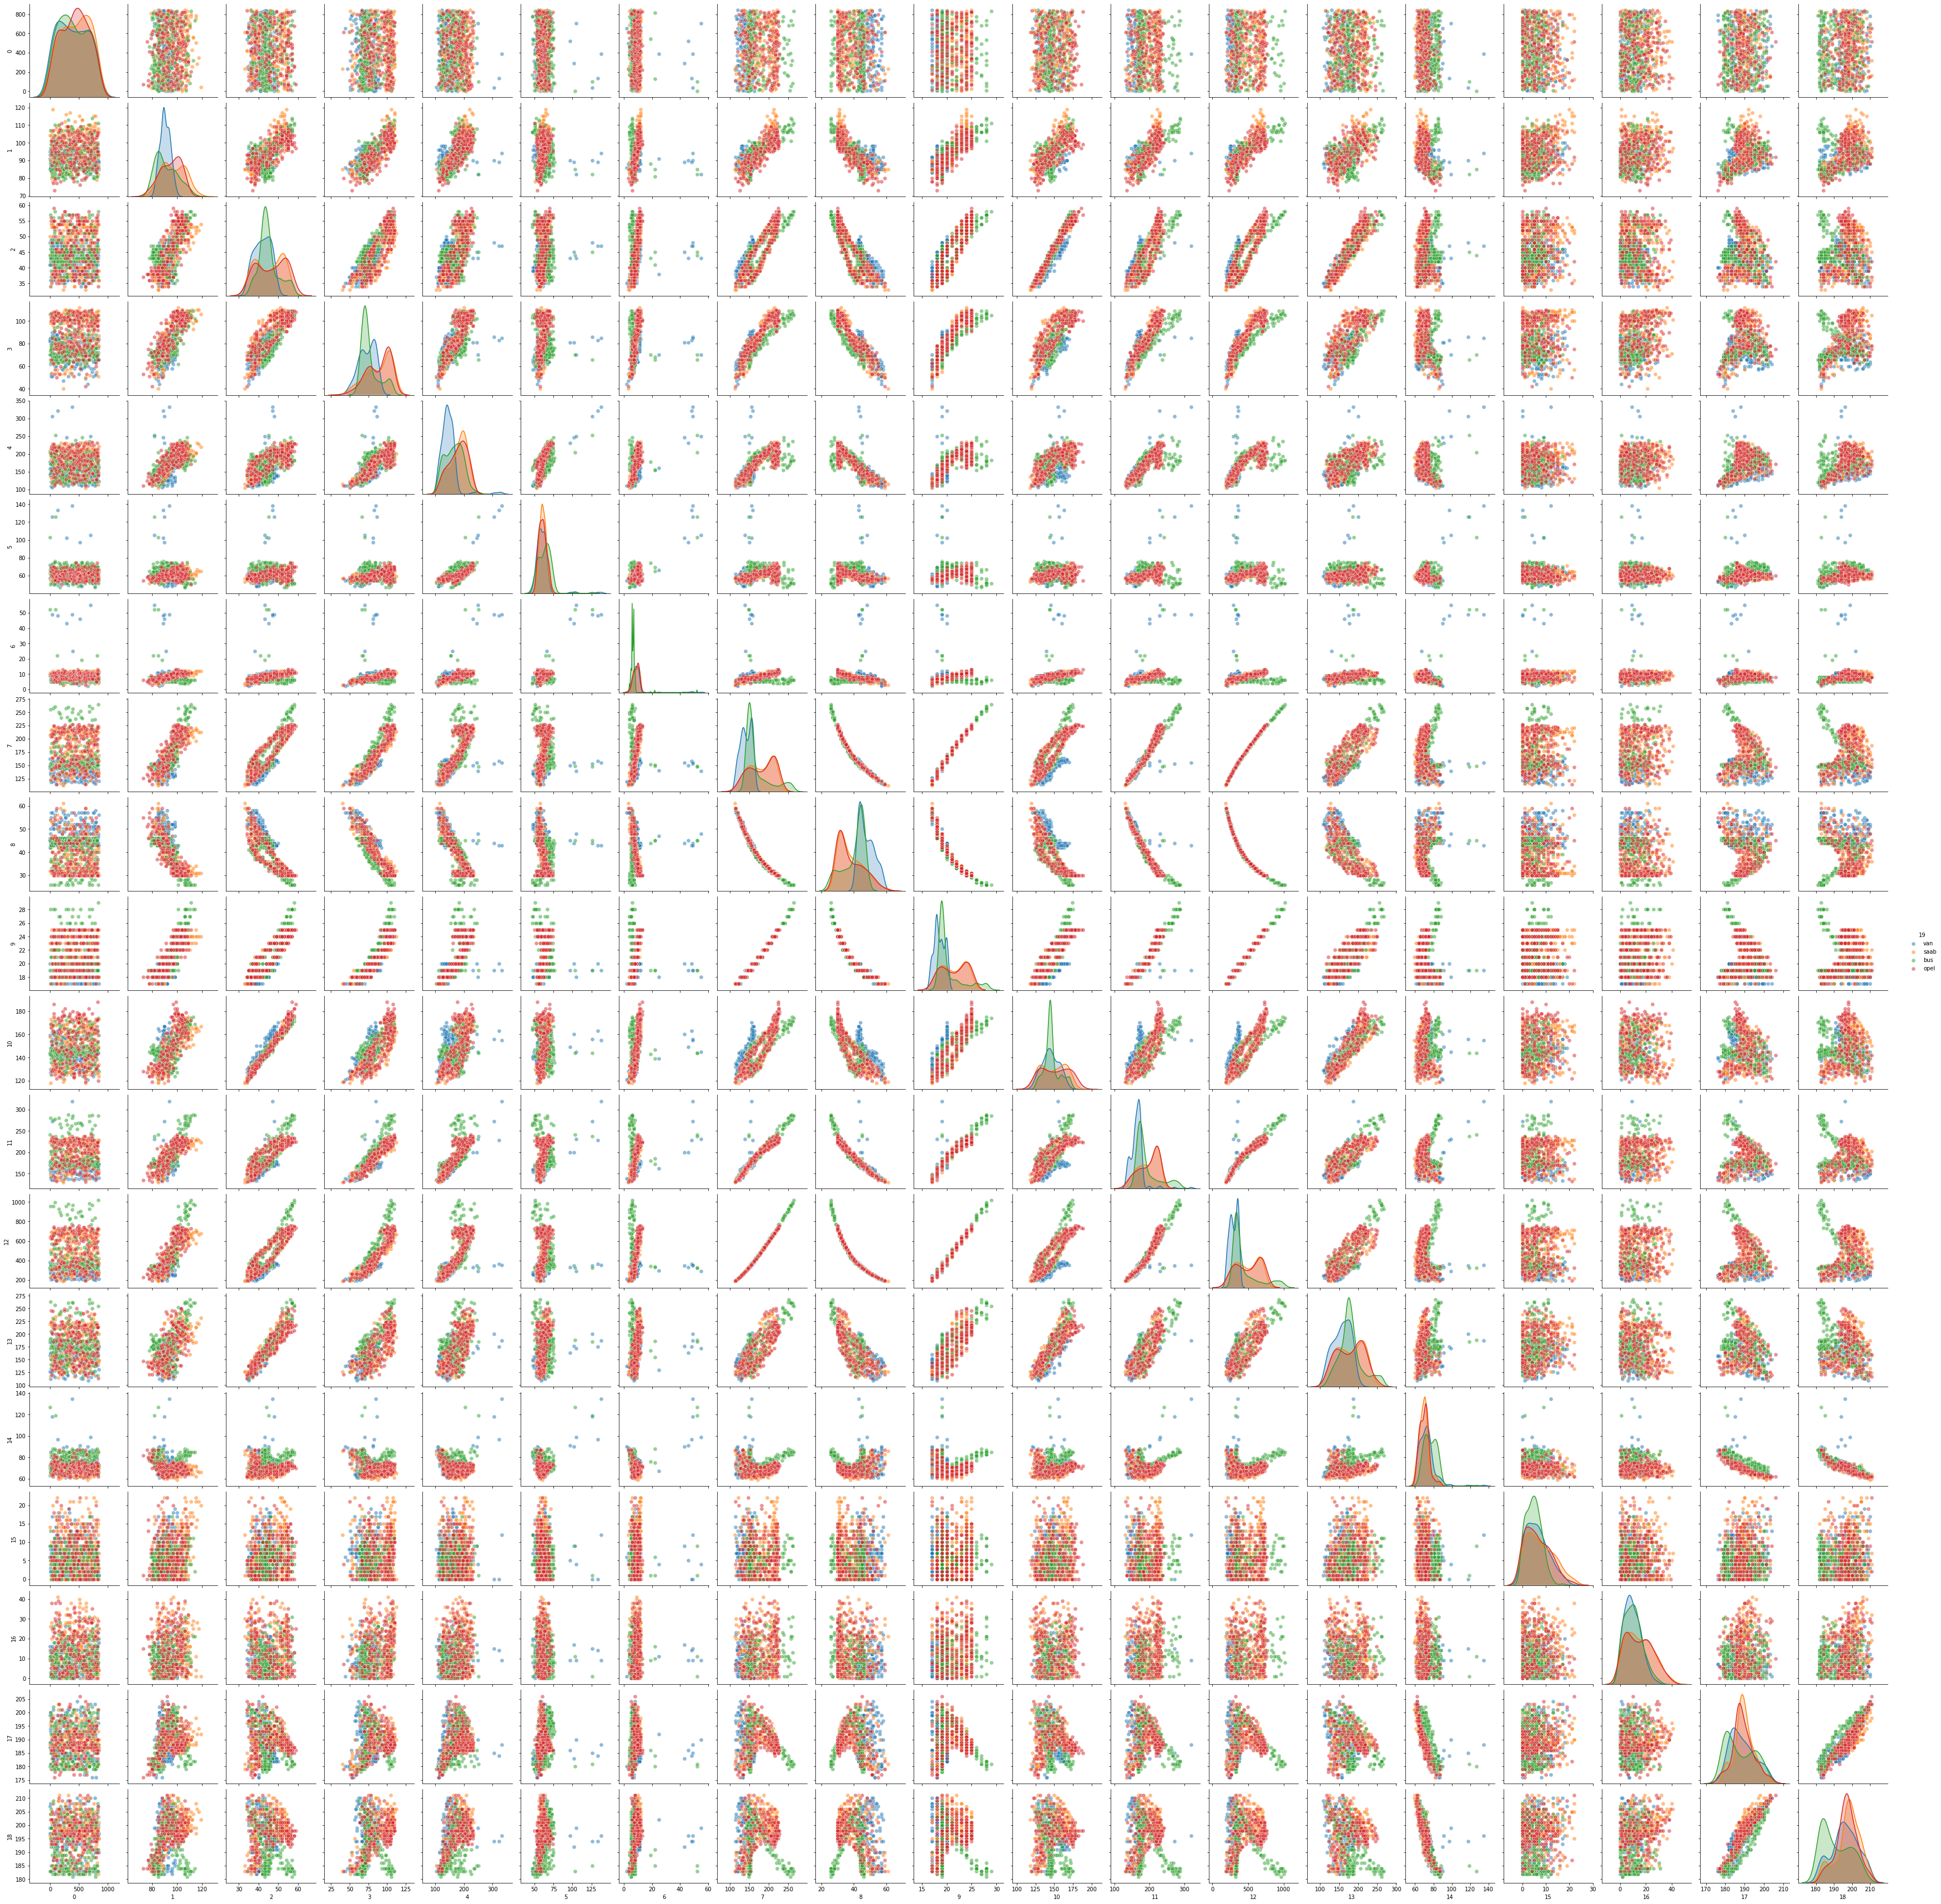

In [7]:
# построим попраные зависимости признаков
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None)

plt.figure(figsize=(15, 30))
sns.pairplot(dataset, plot_kws=dict(s=50, alpha=0.5), hue=19)

**Вывод:** Попытались визуально найти признак по которому выборки будут хорошо отделяться - не получилось.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [31]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', 
                        max_iter= 1000, tol=1e-3)

params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(-20, 20, 100)
}


grid_cv = GridSearchCV(estimator=lr, 
                        param_grid=params, 
                        cv=StratifiedKFold(n_splits=5))

In [32]:
%%time
grid_cv.fit(X_train, y_train)

CPU times: user 47.8 s, sys: 168 ms, total: 48 s
Wall time: 48.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='d...
        10.70707071,  11.11111111,  11.51515152,  11.91919192,
        12.32323232,  12.72727273,  13.13131313,  13.53535354,
        13.93939394,  14.34343434,  14.74747475,  15.15151515,
        15.55555556,  15.95959596,  16.36363636,  16.76767677,


In [33]:
print(grid_cv.best_params_)
C_ = grid_cv.best_params_['C']
penalty_ = grid_cv.best_params_['penalty']

{'C': 11.11111111111111, 'penalty': 'l1'}


Посчитаем `f1` и `accuracy` score:

In [34]:
from sklearn.metrics import roc_curve, accuracy_score, f1_score

def out_score(y_true, y_pred):
    print('accuracy = {}, f1 = {}'.format(
        accuracy_score(y_true, y_pred), 
        f1_score(y_true, y_pred, average='macro')))

lr_best = LogisticRegression(penalty=penalty_, C = C_, 
                             solver='saga', multi_class='multinomial')
lr_best.fit(X_train, y_train)
    
out_score(y_test, lr_best.predict(X_test))

accuracy = 0.7744107744107744, f1 = 0.7671282674624041


Построим `roc кривую`

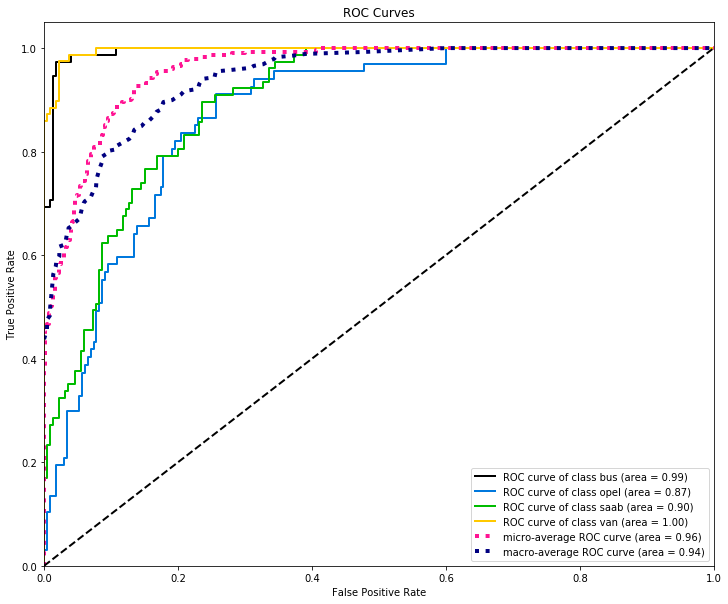

In [43]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, lr_best.predict_proba(X_test), figsize = (12, 10))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

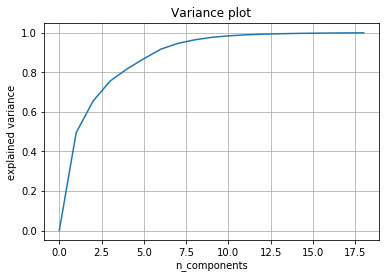

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA().fit(X_train)
variance_list = pca.explained_variance_ratio_

variance_list = [sum(variance_list[:i]) for i in range(len(variance_list))]

plt.plot(variance_list)

plt.title('Variance plot')
plt.ylabel('explained variance')
plt.xlabel('n_components')
plt.grid()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

ToDO: Объйснение почему `n_components`

In [48]:
n_components = 10
model = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [49]:
%%time

# повторим аналогичное 2.1 для измененных данных
grid_cv.fit(X_train_pca, y_train)

CPU times: user 41.3 s, sys: 81.8 ms, total: 41.3 s
Wall time: 41.5 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='d...
        10.70707071,  11.11111111,  11.51515152,  11.91919192,
        12.32323232,  12.72727273,  13.13131313,  13.53535354,
        13.93939394,  14.34343434,  14.74747475,  15.15151515,
        15.55555556,  15.95959596,  16.36363636,  16.76767677,


In [50]:
print(grid_cv.best_params_)
C_ = grid_cv.best_params_['C']
penalty_ = grid_cv.best_params_['penalty']

{'C': 15.151515151515149, 'penalty': 'l2'}


In [19]:
lr_best = LogisticRegression(penalty=penalty_, C = C_, solver='saga', multi_class='multinomial')
lr_best.fit(X_train_pca, y_train)
y_pred = lr_best.predict(X_test_pca)
    
out_score(y_test, y_pred)

accuracy = 0.7710437710437711, f1 = 0.7635805883643033


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

params = {
    'max_depth': np.arange(1, 15),
}

grid_cv_tree = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring='precision_macro', 
                    cv=StratifiedKFold(n_splits=5))

grid_cv_tree.fit(X_train, y_train)

print(grid_cv_tree.best_params_)

depth = grid_cv_tree.best_params_['max_depth']

{'max_depth': 9}


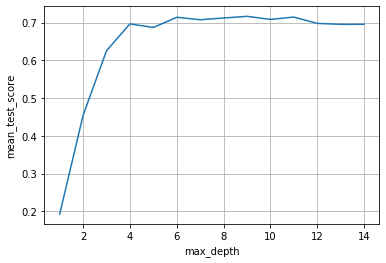

In [51]:
plt.plot(np.arange(1, 15), grid_cv_tree.cv_results_['mean_test_score'])
plt.xlabel("max_depth")
plt.ylabel('mean_test_score')
plt.grid()

In [22]:
dtree_best = DecisionTreeClassifier(max_depth = depth)

dtree_best.fit(X_train, y_train)
y_pred = dtree_best.predict(X_test)
out_score(y_test, y_pred)

accuracy = 0.7272727272727273, f1 = 0.7164547759068897


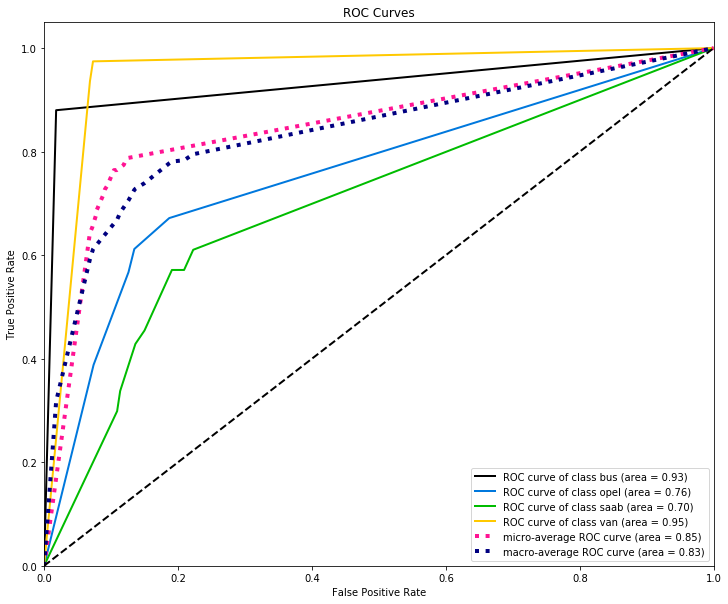

In [24]:
# строим рок кривую
plot_roc(y_test, dtree_best.predict_proba(X_test), figsize = (12, 10))

ToDO: почему так мало treshold'еров (как минимум напиши что ты это заметил)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


model = BaggingClassifier(base_estimator=lr_best)

params = {
    'n_estimators': np.arange(2, 100, 5)
}

In [ ]:
grid_cv_bagging = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring='precision_macro', 
                    cv=StratifiedKFold(n_splits=5))

grid_cv_bagging.fit(X_train, y_train)

print(grid_cv_bagging.best_params_)

best_n_estimators = grid_cv_bagging.best_params_['n_estimators']

In [ ]:
plt.plot(params['n_estimators'], grid_cv_bagging.cv_results_['mean_test_score'])
plt.xlabel("n_estimators")
plt.ylabel('mean_test_score')
plt.title("Bagging")
plt.grid()

In [ ]:
bagging_best = BaggingClassifier(base_estimator=lr_best, n_estimators = best_n_estimators)
bagging_best.fit(X_train, y_train)
y_pred = bagging_best.predict(X_test)

out_score(y_test, y_pred)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
params = {
    'n_estimators': np.arange(2, 100, 5)
}

In [ ]:
grid_cv_rand_forest = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring='precision_macro', 
                    cv=StratifiedKFold(n_splits=5))

grid_cv_rand_forest.fit(X_train, y_train)

print(grid_cv_rand_forest.best_params_)

best_n_estimators_r = grid_cv_rand_forest.best_params_['n_estimators']

In [ ]:
plt.plot(params['n_estimators'], grid_cv_bagging.cv_results_['mean_test_score'])
plt.xlabel("n_estimators")
plt.ylabel('mean_test_score')
plt.title("Random forest")
plt.grid()

In [ ]:
forest_best = RandomForestClassifier(n_estimators = best_n_estimators_r)
forest_best.fit(X_train, y_train)
y_pred = forest_best.predict(X_test)

out_score(y_test, y_pred)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
def metrics_calc(X_train_part, X_test_part, y_train_part, y_test_part, model, model_name):
    accuracy, f1 = [], []
    all_train_part = []
    
    cv = StratifiedKFold(n_splits=10)
    for train_part, test_part in cv.split(X_train_part, y_train_part):
        all_train_part.extend(test_part)
        
        model.fit(X_train_part[all_train_part], y_train_part[all_train_part])
        y_pred = model.predict(X_test_part)
        
        accuracy.append(accuracy_score(y_test_part, y_pred))
        f1.append(f1_score(y_test_part, y_pred, average='macro'))
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for ax, metric, title in zip(axs, [accuracy, f1], ['accuracy score', 'f1 score']):
        ax.plot(np.arange(10)/10, metric,label = model_name)
        ax.set_xlabel('Часть от исходного датасета')
        ax.set_ylabel('score')
        ax.set_title(title)
        ax.grid()
        ax.legend()
    
    fig.show()

In [ ]:
metrics_calc(X_train, X_test, y_train, y_test, lr_best, 'logit')

In [ ]:
metrics_calc(X_train, X_test, y_train, y_test, dtree_best, 'decision tree')

In [ ]:
metrics_calc(X_train, X_test, y_train, y_test, bagging_best, 'bagging')

In [ ]:
metrics_calc(X_train, X_test, y_train, y_test, forest_best, 'rand forest')

# ToDO: 
- написать выводы везде
- сделать отдельную функцию для построения графиков подсчета скора и поиска по сетке